# Частина третя: Аналіз датасет c Kaggle.com

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Прочитайте csv файл (використовуйте функцію read_csv)
* Виведіть перші п'ять рядків (використовується функція head)
* Виведіть розміри датасету (використовуйте атрибут shape)
* Відповідь: Про скільки книг зберігає дані датасет?

In [10]:
file_path = '/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv'
data = pd.read_csv(file_path)

data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

print(data.head())
print()
print(data.shape)
print()
book_names = data['name'].nunique()
print(f'Кол-во книг в рейтинге: {book_names}')





                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

(550, 7)

Кол-во книг в рейтинге: 351


## Первинне дослідження даних

* Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
* **Відповідь**: Чи є в якихось змінних пропуски? (Так / ні)
* Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
* **Відповідь**: Які є унікальні жанри?
* Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
* Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
* **Відповідь**: Максимальна ціна?
* **Відповідь**: Мінімальна ціна?
* **Відповідь**: Середня ціна?
* **Відповідь**: Медіанна ціна?

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Відповідь: Чи є в якихось змінних пропуски? - Нет

Відповідь: Які є унікальні жанри?
Унікальні значення в колонці 'genre': ['Non Fiction' 'Fiction']



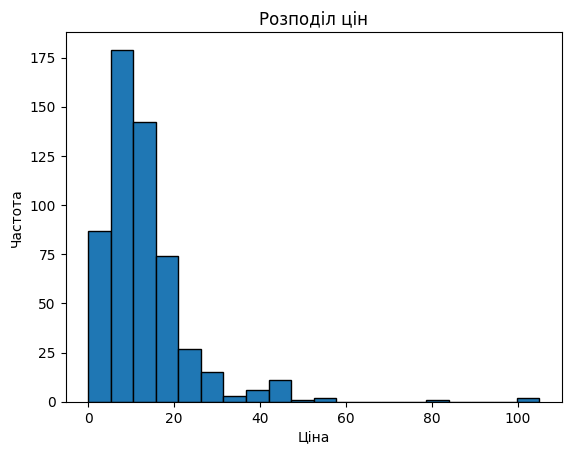


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [16]:
print(data.isnull().sum())
print('Відповідь: Чи є в якихось змінних пропуски? - Нет')
print()


unique_genres = data['genre'].unique()
print('Відповідь: Які є унікальні жанри?')
print("Унікальні значення в колонці 'genre':", unique_genres)
print()


data['price'].plot(kind='hist', bins=20, edgecolor='black')

# Настройка заголовка и меток осей
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print()

max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

## Пошук та сортування даних
* **Відповідь**: Який рейтинг у датасеті найвищий? Відповідь:
* **Відповідь**: Скільки книг мають такий рейтинг? Відповідь:
* **Відповідь**: Яка книга має найбільше відгуків? Відповідь:
* **Відповідь**: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
* **Відповідь**: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
* **Відповідь**: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
* І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
* **Відповідь**: Яка книга остання у відсортованому списку? Відповідь:

In [37]:
max_rating = data['user_rating'].max()
print("Максимальний рейтинг у датасеті:", max_rating)
print()

num_books_with_max_rating = data['user_rating'].value_counts()[max_rating]
print("Кількість книг з максимальним рейтингом:", num_books_with_max_rating)
print()

max_reviews_book = data['reviews'].idxmax()
max_reviews_book_title = data.loc[max_reviews_book, 'name']
print("Книга з найбільшою кількістю відгуків:", max_reviews_book_title)
print()

books_2015 = data[data['year'] == 2015].sort_values(by='price', ascending=False)
most_expensive_book_title = books_2015['name'].iloc[0]
print("Найдорожча книга з Топ-50 у 2015 році:", most_expensive_book_title)
print()

num_fiction_books_2010 = ((data['genre'] == 'Fiction') & (data['year'] == 2010)).sum()
print("Кількість книг жанру Fiction у Топ-50 у 2010 році:", num_fiction_books_2010)
print()

num_books_with_rating_4_9 = len(data[(data['user_rating'] == 4.9) & (data['year'].isin([2010, 2011]))])
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", num_books_with_rating_4_9)
print()

books_2015_asc = books_2015[books_2015['price'] < 8].sort_values(by='price', ascending=True)
print('Всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів')
print(books_2015_asc['name'])
print()

last_book = books_2015_asc.iloc[-1]['name']
print('Яка книга остання у відсортованому списку?', last_book)

Максимальний рейтинг у датасеті: 4.9

Кількість книг з максимальним рейтингом: 52

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing

Найдорожча книга з Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1

Всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
507                                To Kill a Mockingbird
111                                      First 100 Words
123                                 Giraffes Can't Dance
206                           Knock-Knock Jokes for Kids
210                        Laugh-Out-Loud Jokes for Kids
54     Creative Haven Creative Cats Coloring Book (Ad...
224                                     Love You Forever
28                          Baby Touch and Feel: Animals
55     Creative Haven Owls Coloring Book (Adult Color...
478                          The V

## Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [38]:
genre_prices = data.groupby('genre')['price'].agg(['min', 'max'])
print(genre_prices)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Відповідь: Максимальна ціна для жанру Fiction: Відповідь

In [39]:
max_price_fiction = genre_prices.loc['Fiction', 'max']
print("Максимальна ціна для жанру Fiction:", max_price_fiction)

Максимальна ціна для жанру Fiction: 82


Відповідь: Мінімальна ціна для жанру Fiction: Відповідь

In [40]:
min_price_fiction = genre_prices.loc['Fiction', 'min']
print("Мінімальна ціна для жанру Fiction:", min_price_fiction)

Мінімальна ціна для жанру Fiction: 0


Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь

In [41]:
max_price_non_fiction = genre_prices.loc['Non Fiction', 'max']
print("Максимальна ціна для жанру Fiction:", max_price_non_fiction)

Максимальна ціна для жанру Fiction: 105


Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [42]:
min_price_non_fiction = genre_prices.loc['Non Fiction', 'min']
print("Мінімальна ціна для жанру Fiction:", min_price_non_fiction)

Мінімальна ціна для жанру Fiction: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [47]:
aggregated_data = data.groupby('author').agg({'name': 'count'})
print(aggregated_data)
print('Розмірність таблиці', aggregated_data.shape[0] )

                            name
author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]
Розмірність таблиці 248


Який автор має найбільше книг?

In [48]:
author_most_books = aggregated_data['name'].idxmax()
print("Автор з найбільшою кількістю книг:", author_most_books)

Автор з найбільшою кількістю книг: Jeff Kinney


Скільки книг цього автора

In [50]:
author_books = aggregated_data.loc[author_most_books, 'name']
print("Кількість книг автора:", author_books)

Кількість книг автора: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [55]:
authors_rating = data.groupby('author').agg({'user_rating': 'mean'})
print(authors_rating)

                            user_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]


У якого автора середній рейтинг мінімальний?

In [56]:
author_min_rating = authors_rating['user_rating'].idxmin()
print("Автор з найнижчим середнім рейтингом:", author_min_rating)

Автор з найнижчим середнім рейтингом: Donna Tartt


Який у цього автора середній рейтинг

In [59]:
author_rating = authors_rating.loc[author_min_rating, 'user_rating']
print("Рейтинг автора:", author_rating)

Рейтинг автора: 3.9


* З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
* Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [61]:
new_authors = pd.concat([aggregated_data, authors_rating], axis=1)
print(new_authors)
print()
sorted_authors = new_authors.sort_values(by=['name', 'user_rating'], ascending=[True, True])
print(sorted_authors)

                            name  user_rating
author                                       
Abraham Verghese               2     4.600000
Adam Gasiewski                 1     4.400000
Adam Mansbach                  1     4.800000
Adir Levy                      1     4.800000
Admiral William H. McRaven     1     4.700000
...                          ...          ...
Walter Isaacson                3     4.566667
William Davis                  2     4.400000
William P. Young               2     4.600000
Wizards RPG Team               3     4.800000
Zhi Gang Sha                   2     4.600000

[248 rows x 2 columns]

                                    name  user_rating
author                                               
Muriel Barbery                         1     4.000000
Chris Cleave                           1     4.100000
Ian K. Smith M.D.                      1     4.100000
Pierre Dukan                           1     4.100000
Elizabeth Strout                       1     4.200000

Який автор перший у списку?

In [67]:
first_author = sorted_authors.index[0]
print('Перший автор у списку:', first_author)

Перший автор у списку: Muriel Barbery


График по кол-ву книг автора в рейтинге за 2015

             name
genre            
Fiction        17
Non Fiction    33


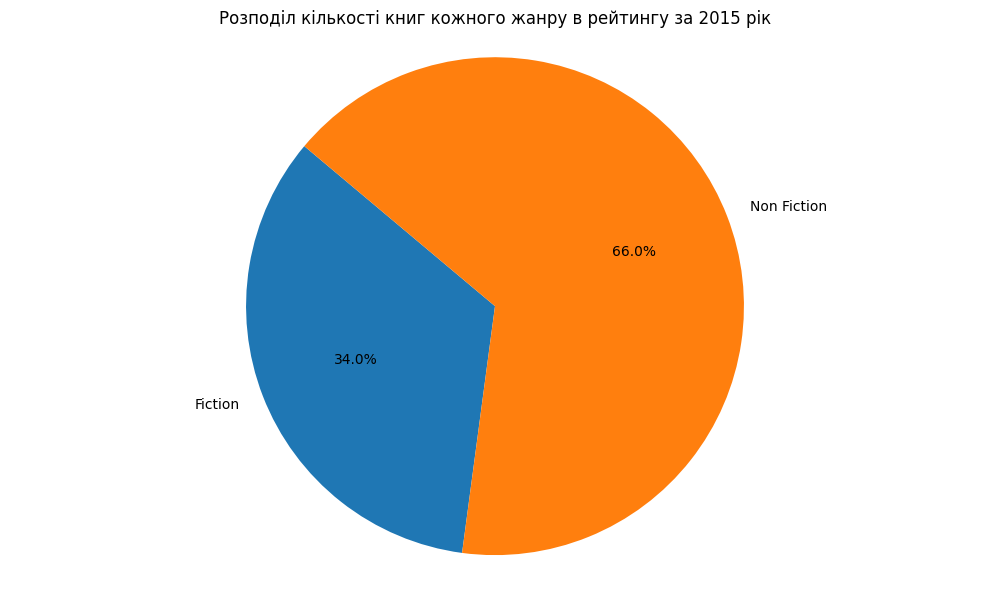

In [75]:
# print(books_2015)
count_books_by_author_2015 = books_2015.groupby(['genre']).agg({'name': 'count'})
print(count_books_by_author_2015)


plt.figure(figsize=(10, 6))
plt.pie(count_books_by_author_2015['name'], labels=count_books_by_author_2015.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Забезпечує кругову форму
plt.title('Розподіл кількості книг кожного жанру в рейтингу за 2015 рік')
plt.tight_layout()
plt.show()